# Magnetic field caused by dipole and uniformly magnetized box

In [1]:
import sys
import os.path

sys.path.append(os.path.abspath(os.path.pardir))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.mmag.unit_cell.fields import field_dipole
from src.mmag.unit_cell.fields import field_rectangular_box
from utils import RotationMatrix

## Uniformly magnetized in Z direction

We will study the comparision between a dipole and a uniformly magnetized box in the Z direction. We will plot the field at several points by rotating an initial vector (1,0,0) along the Z direction therefore we will measure the field at a circle in the x-y plane with modulus 1. 

In [3]:
# position of the dipole
p = np.array([0.0, 0.0, 0.0], dtype=np.float64)

# starting observation point of the field
ro = np.array([1.0, 0.0, 0.0], dtype=np.float64)

# direction of the dipole
m = np.array([0.0, 0.0, 1.0], dtype=np.float64)

# rotation axis along Z direction
axis=np.array([0.0, 0.0, 1.0], dtype=np.float64)
#axis=np.array([1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0)], dtype=np.float64)

# angles from 0 to 2.0*pi
angles = np.linspace(0.0, 2.0*np.pi, 200)

# rotating the observation point
r = [RotationMatrix(angle, axis).dot(ro) for angle in angles]

In [4]:
# calculating field
d_field = [field_dipole(p, m, robs) for robs in r]
d_field_modulus = [np.sqrt(f.dot(f)) for f in d_field ]

# box field calculation, d is the width of the box in the 3 dims.
d = np.array([1.0, 1.0, 1.0], dtype=np.float64)
b_field = [field_rectangular_box(p, d,  m, robs) for robs in r]
b_field_modulus = [np.sqrt(f.dot(f)) for f in b_field ]

<Figure size 432x288 with 0 Axes>

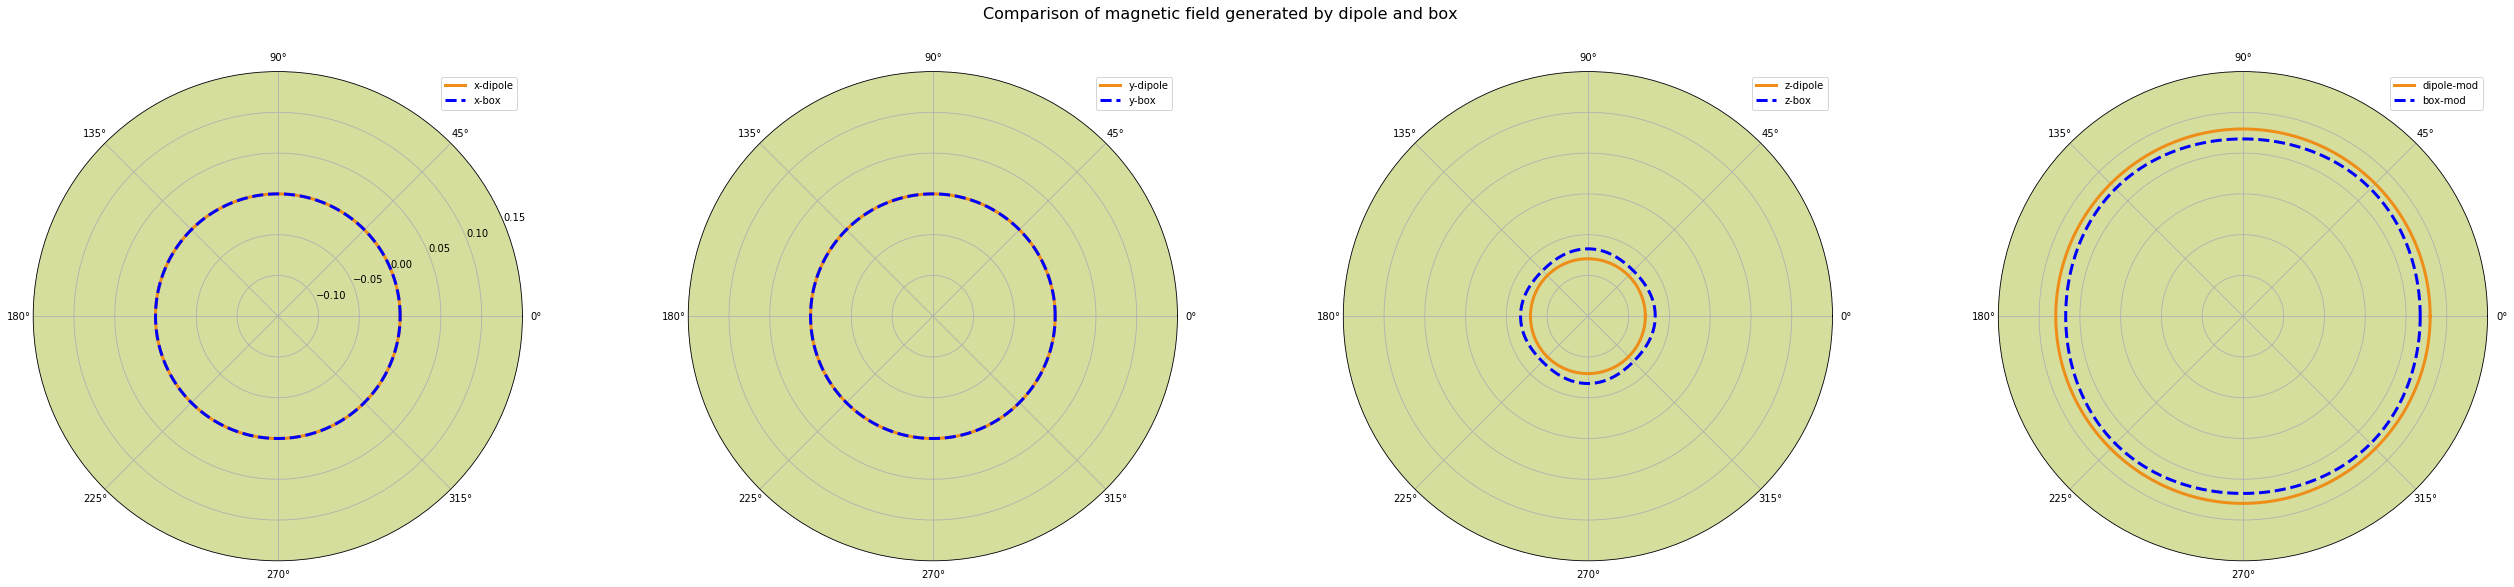

In [5]:
plt.clf()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(45,9), subplot_kw=dict(projection='polar', facecolor='#d5de9c'))

plt.suptitle("Comparison of magnetic field generated by dipole and box", size=16)

plt.ylim(-0.15,0.15)

ax1.plot(angles, [f[0] for f in d_field], color='#ee8d18', lw=3, label='x-dipole')
ax1.plot(angles, [f[0] for f in b_field], color='blue', ls='--', lw=3, label='x-box')
ax1.legend()

ax2.plot(angles, [f[1] for f in d_field], color='#ee8d18', lw=3, label='y-dipole')
ax2.plot(angles, [f[1] for f in b_field], color='blue', ls='--', lw=3, label='y-box')
ax2.legend()

ax3.plot(angles, [f[2] for f in d_field], color='#ee8d18', lw=3, label='z-dipole')
ax3.plot(angles, [f[2] for f in b_field], color='blue', ls='--', lw=3, label='z-box')
ax3.legend()

ax4.plot(angles, d_field_modulus, color='#ee8d18', lw=3, label='dipole-mod')
ax4.plot(angles, b_field_modulus, color='blue', ls='--', lw=3, label='box-mod')
ax4.legend()

plt.show()


The field at this plane does not have component x or y and points directly to negative Z as expected. The shape of the field by the box and by the dipole is pretty similar in terms of magnitude and shape, this is an indicator that the field is well calculated, however we will calculate other cases.

## Uniformly magnetized in X direction

We will do a symmetric calculation, uniformly magnetized in X direction, now we rotate in axis X (i.e. we'll move in the plane x-z) and same magnitude for observation vector. 

In [6]:
# position of the dipole
p = np.array([0.0, 0.0, 0.0], dtype=np.float64)

# starting observation point of the field
ro = np.array([0.0, 1.0, 0.0], dtype=np.float64)

# direction of the dipole
m = np.array([1.0, 0.0, 0.0], dtype=np.float64)

# rotation axis along Z direction
axis=np.array([1.0, 0.0, 0.0], dtype=np.float64)
#axis=np.array([1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0)], dtype=np.float64)

# angles from 0 to 2.0*pi
angles = np.linspace(0.0, 2.0*np.pi, 200)

# rotating the observation point
r = [RotationMatrix(angle, axis).dot(ro) for angle in angles]

In [7]:
# calculating field
d_field = [field_dipole(p, m, robs) for robs in r]
d_field_modulus = [np.sqrt(f.dot(f)) for f in d_field ]

# box field calculation, d is the width of the box in the 3 dims.
d = np.array([1.0, 1.0, 1.0], dtype=np.float64)
b_field = [field_rectangular_box(p, d,  m, robs) for robs in r]
b_field_modulus = [np.sqrt(f.dot(f)) for f in b_field ]

<Figure size 432x288 with 0 Axes>

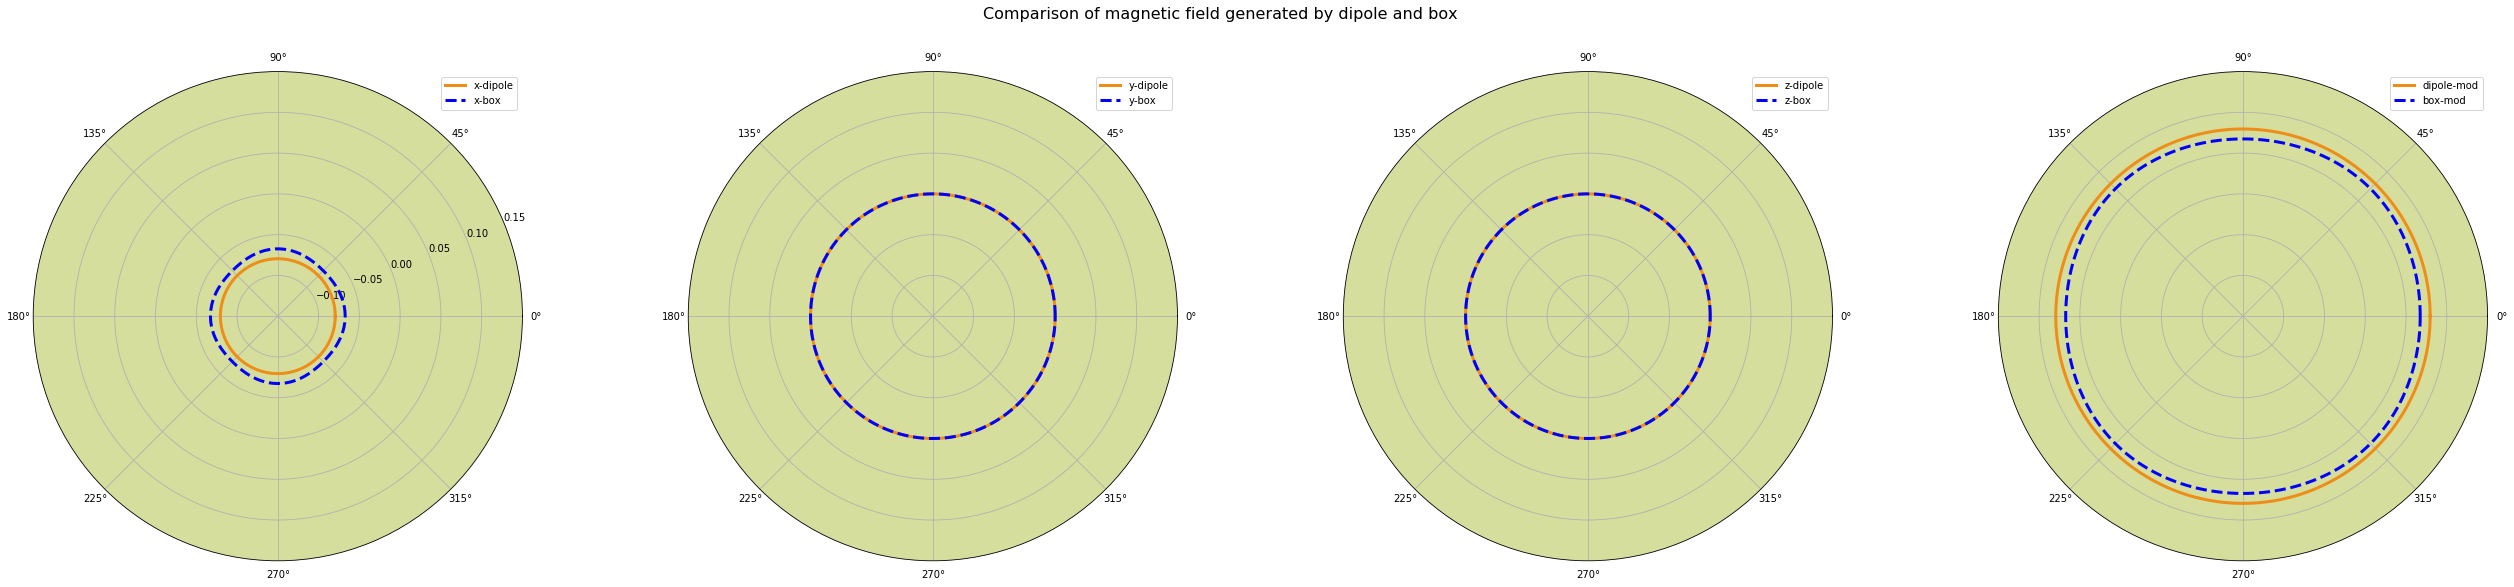

In [8]:
plt.clf()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(45,9), subplot_kw=dict(projection='polar', facecolor='#d5de9c'))

plt.suptitle("Comparison of magnetic field generated by dipole and box", size=16)

plt.ylim(-0.15,0.15)

ax1.plot(angles, [f[0] for f in d_field], color='#ee8d18', lw=3, label='x-dipole')
ax1.plot(angles, [f[0] for f in b_field], color='blue', ls='--', lw=3, label='x-box')
ax1.legend()

ax2.plot(angles, [f[1] for f in d_field], color='#ee8d18', lw=3, label='y-dipole')
ax2.plot(angles, [f[1] for f in b_field], color='blue', ls='--', lw=3, label='y-box')
ax2.legend()

ax3.plot(angles, [f[2] for f in d_field], color='#ee8d18', lw=3, label='z-dipole')
ax3.plot(angles, [f[2] for f in b_field], color='blue', ls='--', lw=3, label='z-box')
ax3.legend()

ax4.plot(angles, d_field_modulus, color='#ee8d18', lw=3, label='dipole-mod')
ax4.plot(angles, b_field_modulus, color='blue', ls='--', lw=3, label='box-mod')
ax4.legend()

plt.show()

We can see here that we've changed X by Z and so in this case the two components that are zero are the y and z components.

## Uniformly magnetized in Z but calculating fiend at plane x=-1

In [9]:
# position of the dipole
p = np.array([0.0, 0.0, 0.0], dtype=np.float64)

# starting observation point of the field
ro = np.array([1.0, 0.0, -1.0], dtype=np.float64)

# direction of the dipole
m = np.array([0.0, 0.0, 1.0], dtype=np.float64)

# rotation axis along Z direction
axis=np.array([0.0, 0.0, 1.0], dtype=np.float64)
#axis=np.array([1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0)], dtype=np.float64)

# angles from 0 to 2.0*pi
angles = np.linspace(0.0, 2.0*np.pi, 200)

# rotating the observation point
r = [RotationMatrix(angle, axis).dot(ro) for angle in angles]

In [10]:
# calculating field
d_field = [field_dipole(p, m, robs) for robs in r]
d_field_modulus = [np.sqrt(f.dot(f)) for f in d_field ]

# box field calculation, d is the width of the box in the 3 dims.
d = np.array([1.0, 1.0, 1.0], dtype=np.float64)
b_field = [field_rectangular_box(p, d,  m, robs) for robs in r]
b_field_modulus = [np.sqrt(f.dot(f)) for f in b_field ]

<Figure size 432x288 with 0 Axes>

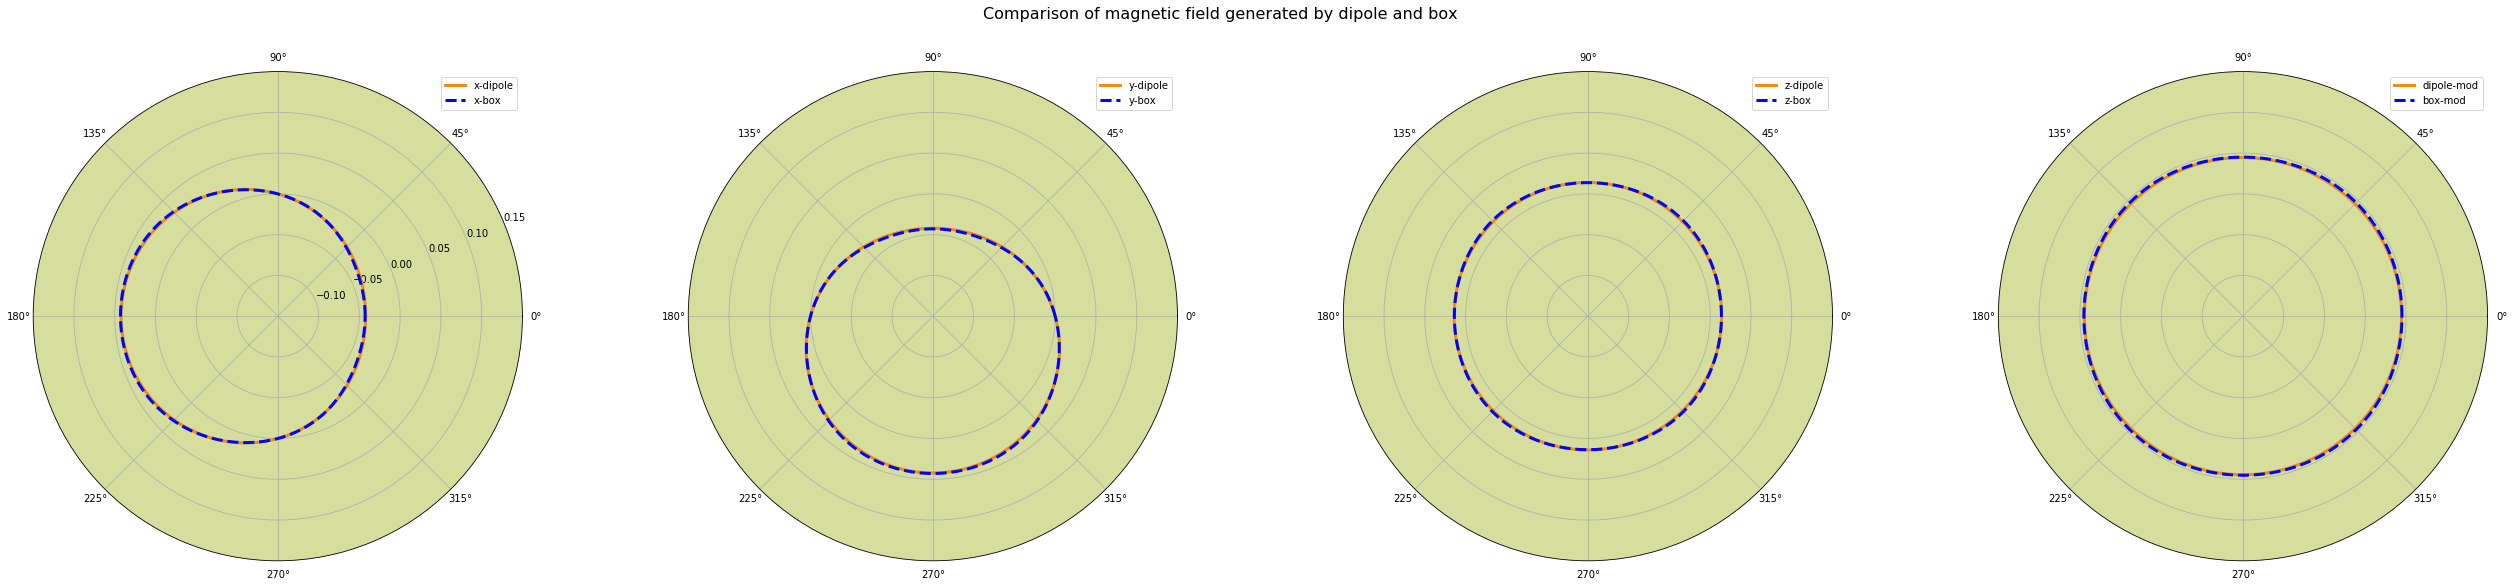

In [11]:
plt.clf()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(45,9), subplot_kw=dict(projection='polar', facecolor='#d5de9c'))

plt.suptitle("Comparison of magnetic field generated by dipole and box", size=16)

plt.ylim(-0.15,0.15)

ax1.plot(angles, [f[0] for f in d_field], color='#ee8d18', lw=3, label='x-dipole')
ax1.plot(angles, [f[0] for f in b_field], color='blue', ls='--', lw=3, label='x-box')
ax1.legend()

ax2.plot(angles, [f[1] for f in d_field], color='#ee8d18', lw=3, label='y-dipole')
ax2.plot(angles, [f[1] for f in b_field], color='blue', ls='--', lw=3, label='y-box')
ax2.legend()

ax3.plot(angles, [f[2] for f in d_field], color='#ee8d18', lw=3, label='z-dipole')
ax3.plot(angles, [f[2] for f in b_field], color='blue', ls='--', lw=3, label='z-box')
ax3.legend()

ax4.plot(angles, d_field_modulus, color='#ee8d18', lw=3, label='dipole-mod')
ax4.plot(angles, b_field_modulus, color='blue', ls='--', lw=3, label='box-mod')
ax4.legend()

plt.show()

Now the case is the same as the first point but we are no longer in the plane z=0. Here we start to see components of the x and y field as expected. Also recall that since we are calculating further away from the pole source, the field of the dipole is quite similar to the box.

## Uniformly magnetized in Z but different rotation axis (1, 1, 1)

In [12]:
# position of the dipole
p = np.array([0.0, 0.0, 0.0], dtype=np.float64)

# starting observation point of the field
ro = np.array([1.0, 0.0, 0.0], dtype=np.float64)

# direction of the dipole
m = np.array([0.0, 0.0, 1.0], dtype=np.float64)

# rotation axis along Z direction
axis=np.array([np.sqrt(1.0/3.0), np.sqrt(1.0/3.0), np.sqrt(1.0/3.0)], dtype=np.float64)
#axis=np.array([1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0)], dtype=np.float64)

# angles from 0 to 2.0*pi
angles = np.linspace(0.0, 2.0*np.pi, 200)

# rotating the observation point
r = [RotationMatrix(angle, axis).dot(ro) for angle in angles]

In [13]:
# calculating field
d_field = [field_dipole(p, m, robs) for robs in r]
d_field_modulus = [np.sqrt(f.dot(f)) for f in d_field ]

# box field calculation, d is the width of the box in the 3 dims.
d = np.array([1.0, 1.0, 1.0], dtype=np.float64)
b_field = [field_rectangular_box(p, d,  m, robs) for robs in r]
b_field_modulus = [np.sqrt(f.dot(f)) for f in b_field ]

<Figure size 432x288 with 0 Axes>

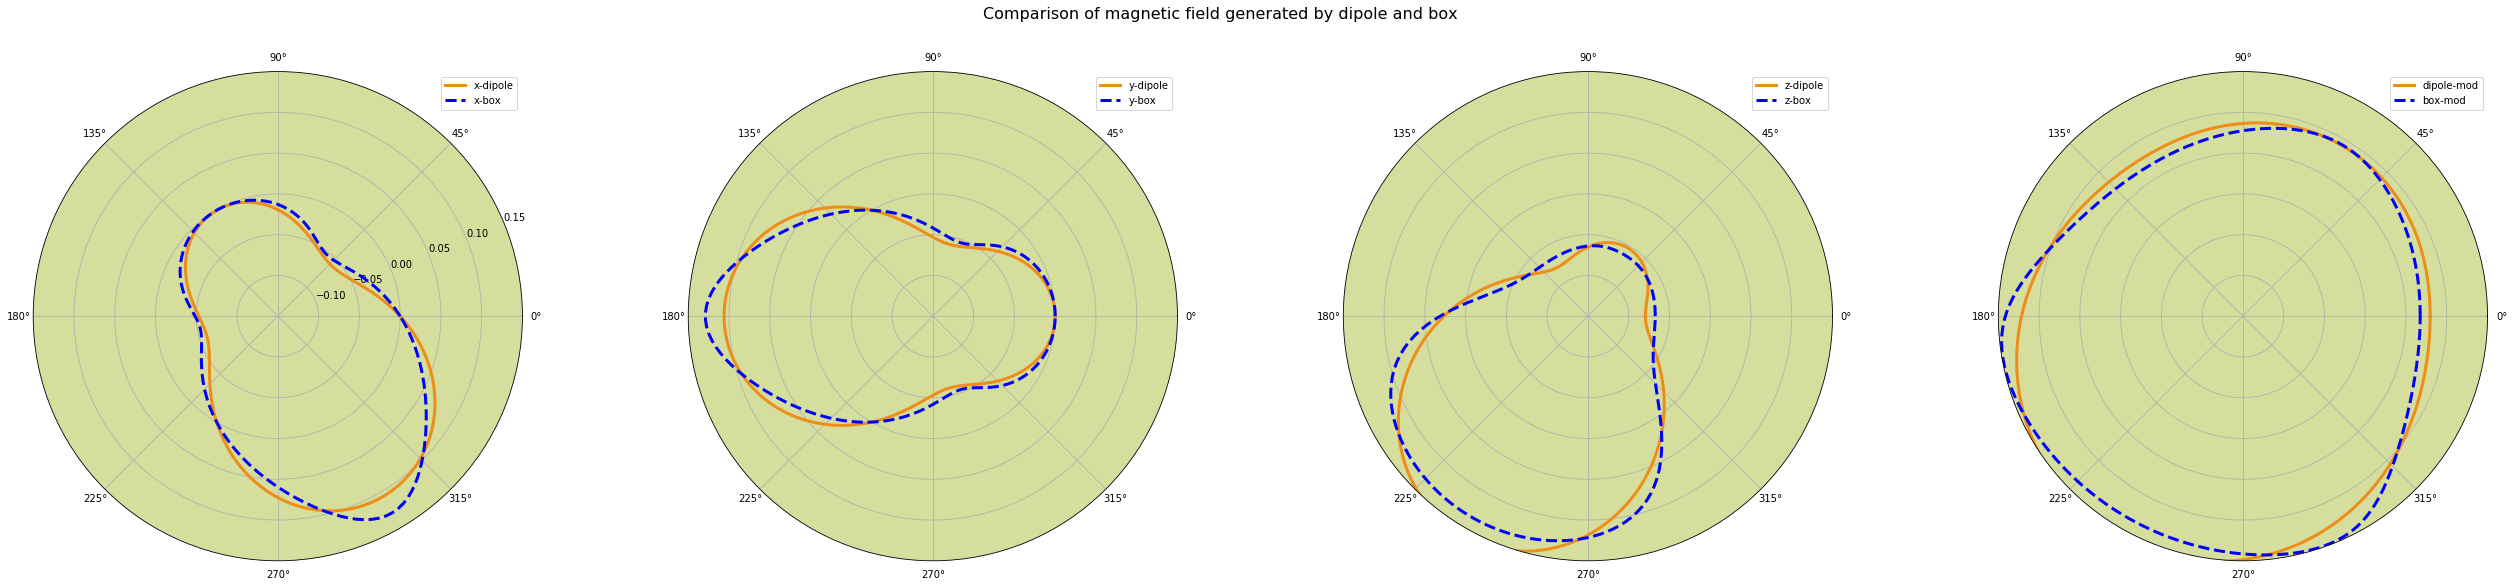

In [14]:
plt.clf()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(45,9), subplot_kw=dict(projection='polar', facecolor='#d5de9c'))

plt.suptitle("Comparison of magnetic field generated by dipole and box", size=16)

plt.ylim(-0.15,0.15)

ax1.plot(angles, [f[0] for f in d_field], color='#ee8d18', lw=3, label='x-dipole')
ax1.plot(angles, [f[0] for f in b_field], color='blue', ls='--', lw=3, label='x-box')
ax1.legend()

ax2.plot(angles, [f[1] for f in d_field], color='#ee8d18', lw=3, label='y-dipole')
ax2.plot(angles, [f[1] for f in b_field], color='blue', ls='--', lw=3, label='y-box')
ax2.legend()

ax3.plot(angles, [f[2] for f in d_field], color='#ee8d18', lw=3, label='z-dipole')
ax3.plot(angles, [f[2] for f in b_field], color='blue', ls='--', lw=3, label='z-box')
ax3.legend()

ax4.plot(angles, d_field_modulus, color='#ee8d18', lw=3, label='dipole-mod')
ax4.plot(angles, b_field_modulus, color='blue', ls='--', lw=3, label='box-mod')
ax4.legend()

plt.show()

## Uniformly magnetized in Z but changing origin of magnetic source

In [15]:
# position of the dipole
p = np.array([1.0, -1.0, 2.0], dtype=np.float64)

# starting observation point of the field
ro = np.array([1.7, -0.6, 0.80], dtype=np.float64)

# direction of the dipole
m = np.array([0.0, 0.0, 1.0], dtype=np.float64)

# rotation axis along Z direction
axis=np.array([np.sqrt(1.0/3.0), np.sqrt(1.0/3.0), np.sqrt(1.0/3.0)], dtype=np.float64)
#axis=np.array([1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0)], dtype=np.float64)

# angles from 0 to 2.0*pi
angles = np.linspace(0.0, 2.0*np.pi, 200)

# rotating the observation point
r = [RotationMatrix(angle, axis).dot(ro) for angle in angles]

In [16]:
# calculating field
d_field = [field_dipole(p, m, robs) for robs in r]
d_field_modulus = [np.sqrt(f.dot(f)) for f in d_field ]

# box field calculation, d is the width of the box in the 3 dims.
d = np.array([1.0, 1.0, 1.0], dtype=np.float64)
b_field = [field_rectangular_box(p, d,  m, robs) for robs in r]
b_field_modulus = [np.sqrt(f.dot(f)) for f in b_field ]

<Figure size 432x288 with 0 Axes>

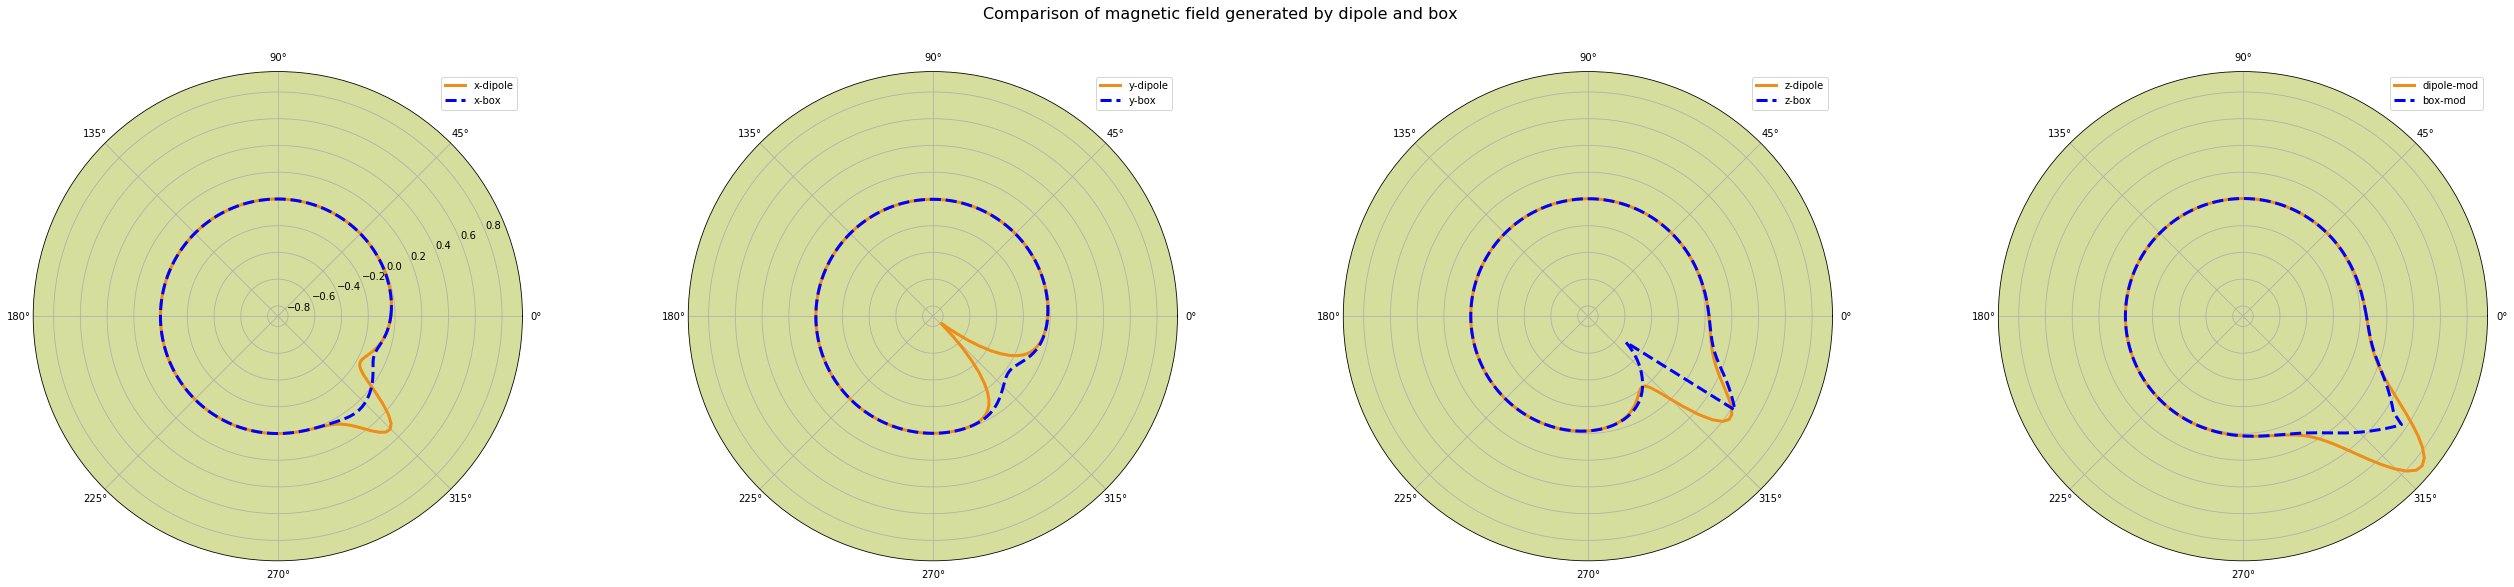

In [17]:
plt.clf()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(45,9), subplot_kw=dict(projection='polar', facecolor='#d5de9c'))

plt.suptitle("Comparison of magnetic field generated by dipole and box", size=16)

#plt.ylim(-0.15,0.15)

#ax1.set_ylim(-0.75, 0.75)
ax1.set_yticks(np.arange(-1.0,1.0,0.2))
ax1.plot(angles, [f[0] for f in d_field], color='#ee8d18', lw=3, label='x-dipole')
ax1.plot(angles, [f[0] for f in b_field], color='blue', ls='--', lw=3, label='x-box')
ax1.legend()

ax2.set_yticks(np.arange(-1.0,1.0,0.2))
ax2.plot(angles, [f[1] for f in d_field], color='#ee8d18', lw=3, label='y-dipole')
ax2.plot(angles, [f[1] for f in b_field], color='blue', ls='--', lw=3, label='y-box')
ax2.legend()

ax3.set_yticks(np.arange(-1.0,1.0,0.2))
ax3.plot(angles, [f[2] for f in d_field], color='#ee8d18', lw=3, label='z-dipole')
ax3.plot(angles, [f[2] for f in b_field], color='blue', ls='--', lw=3, label='z-box')
ax3.legend()

ax4.set_yticks(np.arange(-1.0,1.0,0.2))
ax4.plot(angles, d_field_modulus, color='#ee8d18', lw=3, label='dipole-mod')
ax4.plot(angles, b_field_modulus, color='blue', ls='--', lw=3, label='box-mod')
ax4.legend()

plt.show()

In [18]:
# calculate if a vector r is in the box of p+-d/2.0
def in_box(r, p, d):
    v_min = p - d/2.0
    v_max = p + d/2.0
    
    box_min = (r > v_min).all()
    box_max = (r < v_max).all()
    
    if box_min and box_max:
        return True
    return False
    

In [19]:
for i in range(len(r)):
    kk = r[i]-ro
    if in_box(r[i], p, d):
        print(angles[i]*180/np.pi)
    #print(angles[i]*180/np.pi, np.sqrt(kk.dot(kk)), in_box(r[i], p, d))

305.7286432160804
307.53768844221105
309.34673366834176
311.15577889447235
312.96482412060305
314.77386934673365
316.58291457286435
318.39195979899495
320.2010050251256
322.0100502512563
323.8190954773869
325.6281407035176


## A titled axis of magnetization

In [20]:
# position of the dipole
p = np.array([1.0, 1.5, 2.0], dtype=np.float64)

# starting observation point of the field
ro = np.array([1.0, 1.0, 1.5], dtype=np.float64)

# direction of the dipole, 30 degrees w.r.t x towards z.
m = np.array([1.0, 0.0, 0.0], dtype=np.float64)
m = RotationMatrix(-30.0*np.pi/180.0, np.array([0.0, 1.0, 0.0], dtype=np.float64)).dot(m)
print(m)

# rotation axis along x-y-z direction
axis=np.array([np.sqrt(1.0/3.0), np.sqrt(1.0/3.0), np.sqrt(1.0/3.0)], dtype=np.float64)
#axis=np.array([1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0), 1.0/np.sqrt(3.0)], dtype=np.float64)

# angles from 0 to 2.0*pi
angles = np.linspace(0.0, 2.0*np.pi, 200)

# rotating the observation point
r = [RotationMatrix(angle, axis).dot(ro) for angle in angles]

[0.8660254 0.        0.5      ]


In [21]:
# calculating field
d_field = [field_dipole(p, m, robs) for robs in r]
d_field_modulus = [np.sqrt(f.dot(f)) for f in d_field ]

# box field calculation, d is the width of the box in the 3 dims.
d = np.array([1.0, 1.0, 1.0], dtype=np.float64)
b_field = [field_rectangular_box(p, d,  m, robs) for robs in r]
b_field_modulus = [np.sqrt(f.dot(f)) for f in b_field ]

/home/src/mmag/unit_cell/fields.py:71: RuntimeWarning: invalid value encountered in double_scalars
  arg = (x - sx) * (y - sy) / ((z - sz) * d)
/home/src/mmag/unit_cell/fields.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  arg = (x - sx) * (y - sy) / ((z - sz) * d)
/home/src/mmag/unit_cell/fields.py:113: RuntimeWarning: divide by zero encountered in log
  arg = np.log(np.fabs(y - sy + d))


<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/site-packages/matplotlib/projections/polar.py:63: RuntimeWarning: invalid value encountered in less
  mask = r < 0


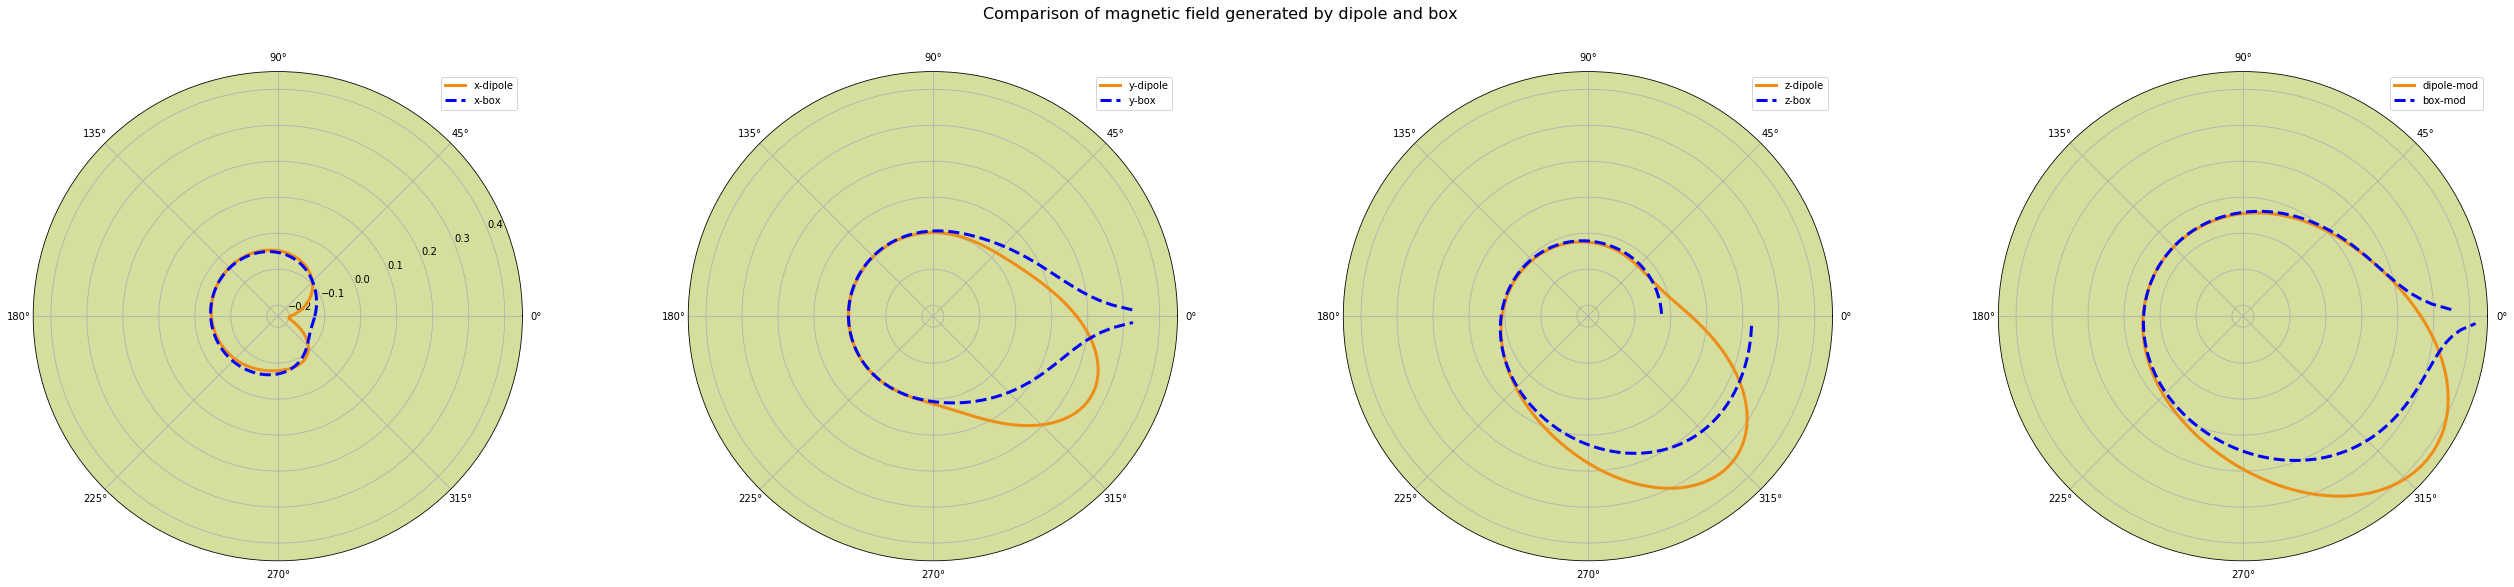

In [22]:
plt.clf()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(45,9), subplot_kw=dict(projection='polar', facecolor='#d5de9c'))

plt.suptitle("Comparison of magnetic field generated by dipole and box", size=16)

#plt.ylim(-0.15,0.15)


#ax1.set_yticks(np.arange(-1.0,1.0,0.2))
ax1.plot(angles, [f[0] for f in d_field], color='#ee8d18', lw=3, label='x-dipole')
ax1.plot(angles, [f[0] for f in b_field], color='blue', ls='--', lw=3, label='x-box')
ax1.legend()

#ax2.set_yticks(np.arange(-1.0,1.0,0.2))
ax2.plot(angles, [f[1] for f in d_field], color='#ee8d18', lw=3, label='y-dipole')
ax2.plot(angles, [f[1] for f in b_field], color='blue', ls='--', lw=3, label='y-box')
ax2.legend()

#ax3.set_yticks(np.arange(-1.0,1.0,0.2))
ax3.plot(angles, [f[2] for f in d_field], color='#ee8d18', lw=3, label='z-dipole')
ax3.plot(angles, [f[2] for f in b_field], color='blue', ls='--', lw=3, label='z-box')
ax3.legend()

#ax4.set_yticks(np.arange(-1.0,1.0,0.2))
ax4.plot(angles, d_field_modulus, color='#ee8d18', lw=3, label='dipole-mod')
ax4.plot(angles, b_field_modulus, color='blue', ls='--', lw=3, label='box-mod')
ax4.legend()

plt.show()

[-1 -1 -1] [-1 -1  1]
[-1 -1 -1] [-1  1 -1]
[-1 -1 -1] [-1  1  1]
[-1 -1 -1] [ 1 -1 -1]
[-1 -1 -1] [ 1 -1  1]
[-1 -1 -1] [ 1  1 -1]
[-1 -1 -1] [1 1 1]
[-1 -1  1] [-1  1 -1]
[-1 -1  1] [-1  1  1]
[-1 -1  1] [ 1 -1 -1]
[-1 -1  1] [ 1 -1  1]
[-1 -1  1] [ 1  1 -1]
[-1 -1  1] [1 1 1]
[-1  1 -1] [-1  1  1]
[-1  1 -1] [ 1 -1 -1]
[-1  1 -1] [ 1 -1  1]
[-1  1 -1] [ 1  1 -1]
[-1  1 -1] [1 1 1]
[-1  1  1] [ 1 -1 -1]
[-1  1  1] [ 1 -1  1]
[-1  1  1] [ 1  1 -1]
[-1  1  1] [1 1 1]
[ 1 -1 -1] [ 1 -1  1]
[ 1 -1 -1] [ 1  1 -1]
[ 1 -1 -1] [1 1 1]
[ 1 -1  1] [ 1  1 -1]
[ 1 -1  1] [1 1 1]
[ 1  1 -1] [1 1 1]


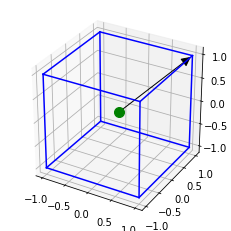

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    print(s, e)
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")

# draw a point
ax.scatter([0], [0], [0], color="g", s=100)

# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

a = Arrow3D([0, 1], [0, 1], [0, 1], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")
ax.add_artist(a)
plt.show()

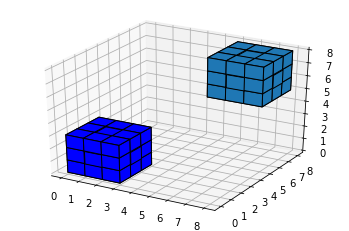

In [127]:
# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
#link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxels = cube1 | cube2 #| link

# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
#colors[link] = 'red'
colors[cube1] = 'blue'
#colors[cube2] = 'green'

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels, facecolors=colors, edgecolor='k')

plt.show()

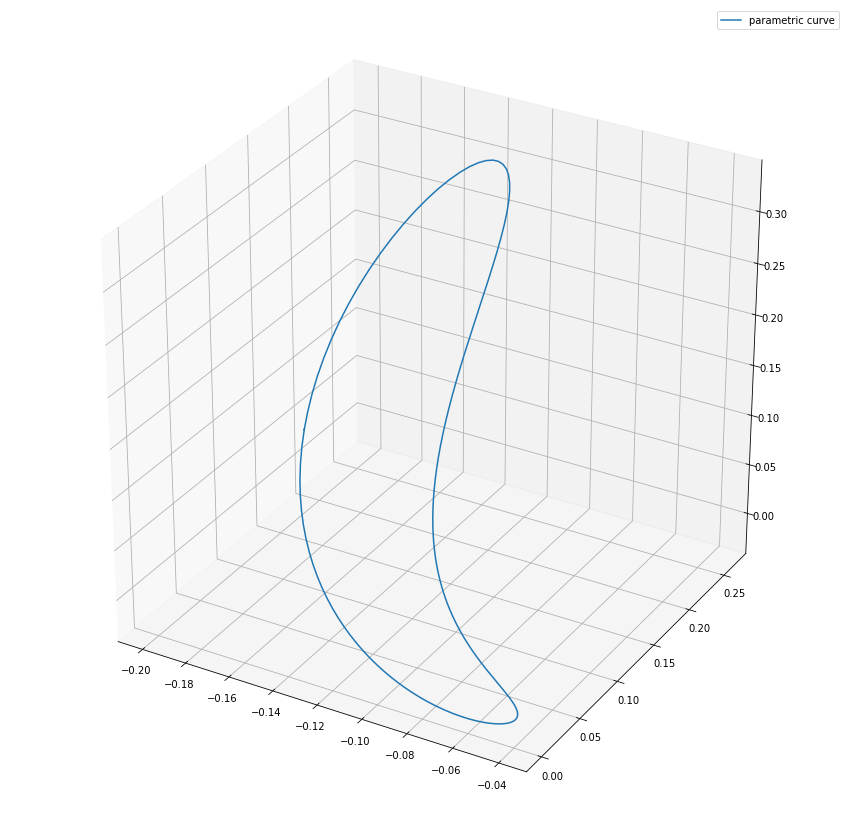

In [124]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
x = [f[0] for f in d_field]
y = [f[1] for f in d_field]
z = [f[2] for f in d_field]
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

In [121]:
for i in range(len(r)):
    kk = r[i]-ro
    print(angles[i]*180/np.pi, (r[i]-ro).dot(r[i]-ro), r[i]-ro)

0.0 0.0 [0. 0. 0.]
1.8090452261306533 0.00016613695794207717 [ 0.00919612 -0.00902999 -0.00016614]
3.6180904522613067 0.0006643822228355512 [ 0.01854922 -0.01788484 -0.00066438]
5.427135678391959 0.001494239132964694 [ 0.02804996 -0.02655572 -0.00149424]
7.236180904522613 0.0026548804689140596 [ 0.03768888 -0.03503399 -0.00265488]
9.045226130653267 0.004145149278158761 [ 0.04745636 -0.04331121 -0.00414515]
10.854271356783919 0.005963560028339863 [ 0.05734268 -0.05137912 -0.00596356]
12.663316582914574 0.00810830008807547 [ 0.06733797 -0.05922967 -0.0081083 ]
14.472361809045227 0.010577231533830968 [ 0.07743227 -0.06685504 -0.01057723]
16.28140703517588 0.013367893281047656 [ 0.08761553 -0.07424764 -0.01336789]
18.090452261306535 0.016477503537405732 [ 0.09787759 -0.08140008 -0.0164775 ]
19.899497487437184 0.01990296257577478 [ 0.10820821 -0.08830525 -0.01990296]
21.708542713567837 0.023640855824089813 [ 0.11859711 -0.09495626 -0.02364086]
23.517587939698497 0.02768745726907037 [ 0.1290

In [115]:
for i in range(len(r)):
    kk = r[i]-ro
    if in_box(r[i], p, d):
        print(angles[i]*180/np.pi)
    #print(angles[i]*180/np.pi, np.sqrt(kk.dot(kk)), in_box(r[i], p, d))